<a href="https://colab.research.google.com/github/takumi-maker/bert/blob/main/bond_arbitragever1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import numpy as np
import pandas as pd
import math
import statistics
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt

In [ ]:
df_1 = pd.read_csv("債券複利データセット3.csv")
df_1 = df_1.drop(df_1.columns[0], axis=1)
columns_len = len(df_1.columns)
length = len(df_1)
df_1

,GJGC2,GJGC5,GJGC7,GJGC10,GJGC15,GJGC20,GJGC30,GJGC40
0,-0.128,-0.114,-0.080,0.030,0.242,0.414,0.649,0.666
1,-0.128,-0.119,-0.084,0.025,0.231,0.405,0.635,0.649
2,-0.123,-0.104,-0.079,0.030,0.231,0.410,0.643,0.661
3,-0.129,-0.104,-0.079,0.030,0.226,0.414,0.649,0.670
4,-0.129,-0.098,-0.069,0.045,0.252,0.438,0.658,0.679
...,...,...,...,...,...,...,...,...
974,0.625,0.780,0.863,1.114,1.561,1.898,2.268,2.554
975,0.630,0.784,0.863,1.114,1.566,1.900,2.271,2.569
976,0.645,0.808,0.902,1.176,1.595,1.934,2.288,2.588
977,0.640,0.804,0.897,1.172,1.590,1.918,2.280,2.588


In [ ]:
df_1 = pd.read_csv("債券複利データセット3.csv")
df_1 = df_1.drop(df_1.columns[0], axis=1)
columns_len = len(df_1.columns)
length = len(df_1)
df_1
df_1["select_fly"] = df_1["GJGC7"]*2 - df_1["GJGC5"] - df_1["GJGC10"]
df_1 = df_1.drop('GJGC2',axis=1)
df_1 = df_1.drop('GJGC5',axis=1)
df_1 = df_1.drop('GJGC7',axis=1)
df_1 = df_1.drop('GJGC10',axis=1)
df_1 = df_1.drop('GJGC15',axis=1)
df_1 = df_1.drop('GJGC20',axis=1)
df_1 = df_1.drop('GJGC30',axis=1)
df_1 = df_1.drop('GJGC40',axis=1)
df_1

,select_fly
0,-0.076
1,-0.074
2,-0.084
3,-0.084
4,-0.085
...,...
974,-0.168
975,-0.172
976,-0.180
977,-0.182


In [ ]:
df_array = df_1.to_numpy()
df_array = np.squeeze(df_array)
df_array

array([-0.076 , -0.074 , -0.084 , -0.084 , -0.085 , -0.09  , -0.099 ,
       -0.089 , -0.078 , -0.074 , -0.089 , -0.09  , -0.09  , -0.084 ,
       -0.083 , -0.084 , -0.085 , -0.077 , -0.065 , -0.055 , -0.054 ,
       -0.068 , -0.067 , -0.062 , -0.066 , -0.06  , -0.065 , -0.055 ,
       -0.054 , -0.062 , -0.067 , -0.034 , -0.048 , -0.065 , -0.059 ,
       -0.0658, -0.08  , -0.053 , -0.067 , -0.069 , -0.067 , -0.077 ,
       -0.063 , -0.063 , -0.062 , -0.064 , -0.064 , -0.064 , -0.066 ,
       -0.079 , -0.081 , -0.075 , -0.087 , -0.067 , -0.064 , -0.055 ,
       -0.069 , -0.049 , -0.063 , -0.056 , -0.05  , -0.055 , -0.062 ,
       -0.046 , -0.057 , -0.053 , -0.049 , -0.06  , -0.056 , -0.072 ,
       -0.073 , -0.065 , -0.06  , -0.062 , -0.064 , -0.064 , -0.07  ,
       -0.069 , -0.061 , -0.059 , -0.06  , -0.047 , -0.051 , -0.053 ,
       -0.053 , -0.06  , -0.052 , -0.062 , -0.063 , -0.07  , -0.07  ,
       -0.072 , -0.064 , -0.061 , -0.065 , -0.065 , -0.069 , -0.059 ,
       -0.072 , -0.0

In [ ]:
def likelihood(params,X):
    alpha = params
    sum_list = []
    for i in range(1,len(X)):
      dif = (X[i]-X[i-1]*math.exp(-alpha))**2/(1-math.exp(-2*alpha))
      sum_list.append(dif)
    beta = np.sqrt(2*alpha/(len(X)-1)*sum(sum_list))
    #print("beta:",beta)
    #print("alpha:",alpha)

    LL_func = -(len(X)-1)/2*math.log(beta**2/(2*alpha))-(len(X)-1)/2*math.log(1-math.exp(-2*alpha))-alpha/(beta**2)*sum(sum_list)

    return -1*LL_func

In [ ]:
def beta(params,X):
    alpha = params
    sum_list = []
    for i in range(1,len(X)):
      dif = (X[i]-X[i-1]*math.exp(-alpha))**2/(1-math.exp(-2*alpha))
      sum_list.append(dif)
    beta = np.sqrt(2*alpha/(len(X)-1)*sum(sum_list))


    return beta

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing
import cvxpy as cp
from scipy.optimize import minimize
from scipy import special

magic_num = 90
estimate_num = 150

c= float(0.05)

df_array = df_1.to_numpy()
df_array = np.squeeze(df_array)
df_array

for i in range(1,8):
  total_num = 100*i
  print(total_num)

  total_list = []
  y_list = []
  result_list = []
  predict_flag2 = 0
  for j in range(magic_num+2,len(df_array)):
    X_return_list = []
    for k in range(magic_num):
      X_return_list.append(df_array[j-k])

    X_list2 = list(reversed(X_return_list))
    #if j ==200:
        #print(X_list2)
    total_list.append(X_list2)
  #print(len(y_list))
  for j in range(len(total_list)):
    if j <= len(total_list)-1-total_num:
      continue
    #print(j)
    X_array = np.array(total_list[j])
    #if j ==900:
      #print(X_array)

    initial_params = 1.0

    #print(likelihood_1(initial_params,X_array))


    constraints = ({'type': 'ineq', 'fun': lambda x: x -0.000001})
    result = minimize(likelihood, initial_params, args=X_array,constraints=constraints )
    estimated_params = result.x
    beta_ = float(beta(estimated_params,X_array))
    #print("alpha:",estimated_params)
    #print("beta:",beta_)
    alpha = float(estimated_params)
    print(type(beta_))



    a = -c/4- c**2 * alpha / (4 * (c**3 * alpha**3 + 24 * c * alpha**2 * beta_**2 - 4 * np.sqrt(3 * c**4 * alpha**5 * beta_**2 + 36 * c**2 * alpha**4 * beta_**4))**(1/3)) - (c**3 * alpha**3 + 24 * c * alpha**2 * beta_**2 - 4 * np.sqrt(3 * c**4 * alpha**5 * beta_**2 + 36 * c**2 * alpha**4 * beta_**4))**(1/3) / (4*alpha)
    m = -a

    T =math.pi/alpha*(-1*special.erfi(m * np.sqrt(alpha)/beta_) + special.erfi(a * np.sqrt(alpha)/beta_))

    print("m:",m)
    print("a:",a)
    print("T:",T)
    print(df_array[j])

In [ ]:
  plt.plot(df_array)
  plt.show()

In [ ]:
import statsmodels.tsa.stattools as ts
ts.adfuller(df_array, 1)

(np.float64(-4.37718747530377),
 np.float64(0.00032567611928227693),
 0,
 978,
 {'1%': np.float64(-3.437054035425408),
  '5%': np.float64(-2.8644997864059363),
  '10%': np.float64(-2.5683459429326576)},
 np.float64(-5710.425449778432))

100


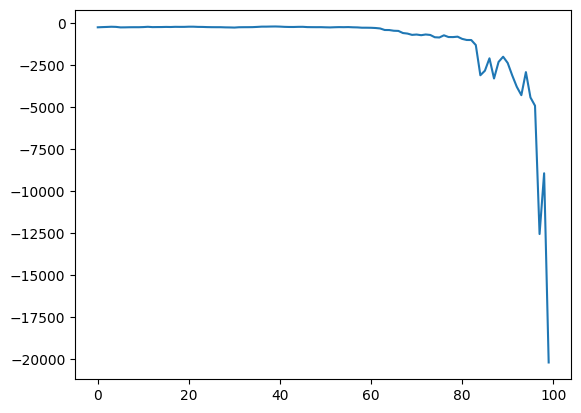

[np.float64(-240.6700409401395), np.float64(-229.11809629709856), np.float64(-219.47080364034414), np.float64(-207.6689768914123), np.float64(-216.0517043561062), np.float64(-245.80850785067005), np.float64(-242.94479397408188), np.float64(-236.83525466748543), np.float64(-234.89119214299902), np.float64(-235.263636945909), np.float64(-227.16843435378334), np.float64(-209.96740547315045), np.float64(-229.38474632023207), np.float64(-225.97514180576275), np.float64(-224.7611936820185), np.float64(-217.74522052211435), np.float64(-222.91579809640476), np.float64(-212.52749955222117), np.float64(-215.51185101200534), np.float64(-214.76315741401652), np.float64(-204.55248456023185), np.float64(-204.74320819839656), np.float64(-216.1702697005851), np.float64(-218.74399052727188), np.float64(-228.29906614264752), np.float64(-232.9716361274204), np.float64(-234.55424233750273), np.float64(-234.77710834705383), np.float64(-244.31805490407098), np.float64(-248.22163841228806), np.float64(-256.0

<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))


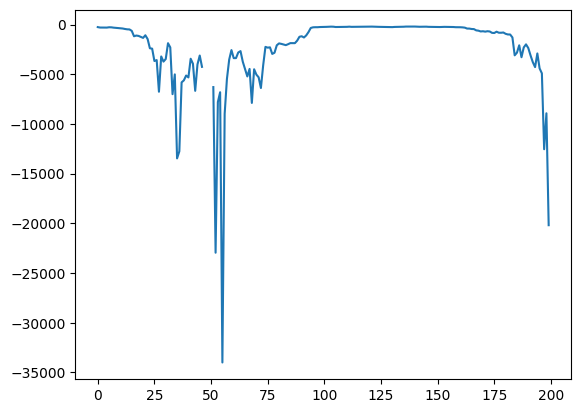

[np.float64(-254.8778046610918), np.float64(-298.29899111927966), np.float64(-299.08465795529895), np.float64(-300.6855362071685), np.float64(-303.3811812033494), np.float64(-270.9487404255608), np.float64(-277.4146266900364), np.float64(-310.13886214829614), np.float64(-326.7081370211202), np.float64(-351.65051673343805), np.float64(-373.2001556990184), np.float64(-395.93267761424585), np.float64(-443.15089251935285), np.float64(-478.2242282118182), np.float64(-488.8550643621723), np.float64(-633.2028654187822), np.float64(-1175.6668470513455), np.float64(-1104.3334192435473), np.float64(-1141.3602473771273), np.float64(-1235.4826604355308), np.float64(-1339.853040069137), np.float64(-1077.0705709527801), np.float64(-1455.49272572824), np.float64(-2383.67253007798), np.float64(-2422.6263877405972), np.float64(-3669.130932323586), np.float64(-3573.9664940021758), np.float64(-6758.9251993734015), np.float64(-3207.5824660164058), np.float64(-3727.1611998691546), np.float64(-3464.77140985

<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encoun

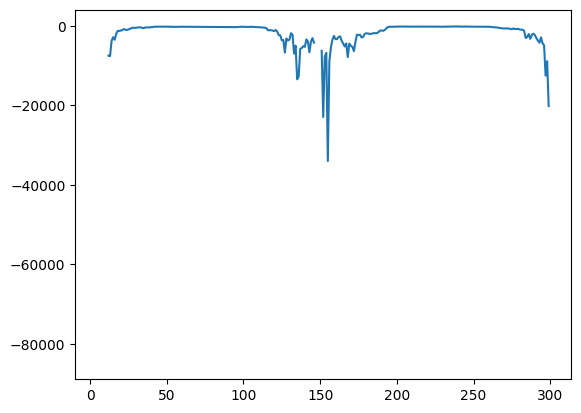

[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(-84629.69958035623), np.float64(nan), np.float64(-36059.31825770716), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(-7528.9462305009765), np.float64(-7651.525245051615), np.float64(-3830.4143776710757), np.float64(-2889.510997420571), np.float64(-3549.368941429408), np.float64(-2054.551242141542), np.float64(-1296.766146438234), np.float64(-1341.7754534519827), np.float64(-1184.9324602838974), np.float64(-1136.4581023303608), np.float64(-834.2270918973056), np.float64(-997.6720799634357), np.float64(-1077.0034269872199), np.float64(-912.7926224705701), np.float64(-811.5772733265835), np.float64(-574.4329550893137), np.float64(-500.2653847421266), np.float64(-551.501176009716), np.float64(-507.84667596647824), np.float64(-476.80485451953524), np.float64(-422.9386628365999), np.float64(-383.93223250229755), np.float64(-575.9465883169139), np.float64(-609.61296

<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encoun

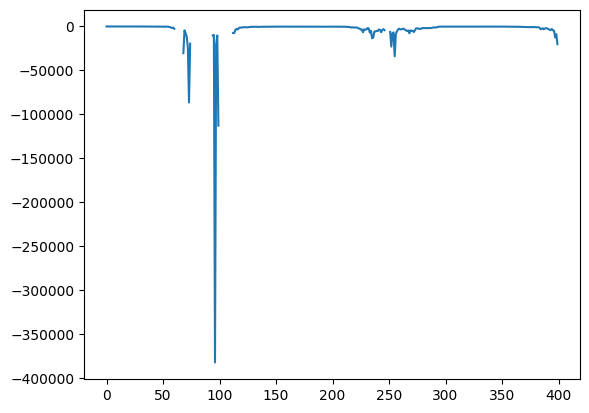

[np.float64(-86.85406409926554), np.float64(-83.51437607673438), np.float64(-82.08543719153903), np.float64(-102.42829223354323), np.float64(-100.41894333986369), np.float64(-98.11899092751602), np.float64(-97.40932547565386), np.float64(-102.96064417136569), np.float64(-103.16710712360637), np.float64(-101.00701560618975), np.float64(-116.75538940437801), np.float64(-119.44050387927048), np.float64(-116.28295780933223), np.float64(-117.12799663887547), np.float64(-121.02886139559911), np.float64(-121.52413593007715), np.float64(-114.79310994908917), np.float64(-114.80946541942335), np.float64(-114.1318519150137), np.float64(-110.25139939660465), np.float64(-111.50153629971054), np.float64(-107.80231672218638), np.float64(-106.43837062583522), np.float64(-110.5050633892621), np.float64(-113.8817879910256), np.float64(-111.48411744425026), np.float64(-110.40858858166244), np.float64(-112.36171453188727), np.float64(-104.5133366858723), np.float64(-99.65725600554511), np.float64(-104.553

<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encoun

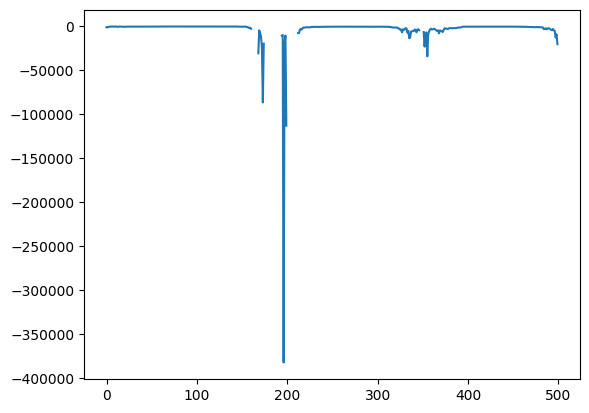

[np.float64(-881.8174470396885), np.float64(-1195.204175984491), np.float64(-519.6387581754703), np.float64(-367.0152962986302), np.float64(-192.87975119616004), np.float64(-231.62857035231397), np.float64(-99.73697204532779), np.float64(-152.8407651967728), np.float64(-163.34472695276946), np.float64(-168.70834168025416), np.float64(-186.49302737680404), np.float64(-199.05034949725803), np.float64(-378.6661316792787), np.float64(-415.36262905152813), np.float64(-139.614482661094), np.float64(-156.16753471679473), np.float64(-173.87701502244613), np.float64(-183.04075672449832), np.float64(-216.5827941776061), np.float64(-287.49365701820267), np.float64(-465.1107869251652), np.float64(-263.2817173812935), np.float64(-224.72872008812894), np.float64(-200.64983942542355), np.float64(-206.9184579709554), np.float64(-243.98849088571708), np.float64(-230.44940801035366), np.float64(-215.56782328583589), np.float64(-221.2447552469311), np.float64(-232.8215131193355), np.float64(-238.21215432

<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encoun

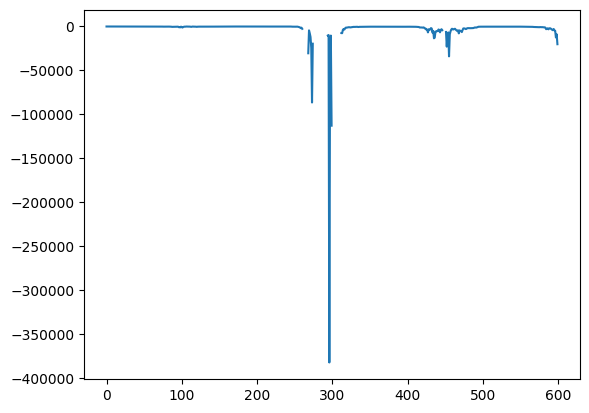

[np.float64(-50.17959194251867), np.float64(-50.25172981063218), np.float64(-46.777003797594695), np.float64(-45.1674870430494), np.float64(-38.19383047970245), np.float64(-30.37352793000136), np.float64(-28.843751572097634), np.float64(-27.18893525048019), np.float64(-32.62477147421758), np.float64(-29.690394433396065), np.float64(-33.39112764913254), np.float64(-33.8064057266403), np.float64(-36.93427298406839), np.float64(-39.452127193419976), np.float64(-36.86628605869887), np.float64(-34.02628448400221), np.float64(-32.18308616078768), np.float64(-34.852362258264904), np.float64(-32.28054331455102), np.float64(-28.02627839728928), np.float64(-29.00204631364505), np.float64(-25.528982809668303), np.float64(-25.942511260292292), np.float64(-31.409413782399753), np.float64(-29.359356385960094), np.float64(-32.62473436675715), np.float64(-32.69500410725413), np.float64(-32.692009921021764), np.float64(-40.601822875970626), np.float64(-46.63200604958328), np.float64(-50.257703700364374

<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encountered in sqrt
  s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
<ipython-input-20-3574005154>:28: RuntimeWarning: invalid value encoun

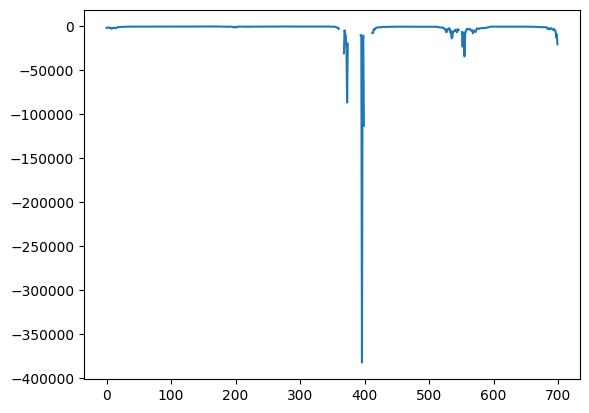

[np.float64(-1639.0422209914827), np.float64(-1325.7713028564237), np.float64(-1269.1672978187746), np.float64(-1200.5115308767874), np.float64(-1298.0977474884385), np.float64(-1864.3821206901082), np.float64(-1573.1368300273698), np.float64(-1900.0489807593242), np.float64(-2690.698196138154), np.float64(-1736.0811664421403), np.float64(-1724.497839283002), np.float64(-1713.9323464478464), np.float64(-1488.3755148749985), np.float64(-1790.6345039509906), np.float64(-2151.3809979787793), np.float64(-1500.2545225795102), np.float64(-1404.885402169993), np.float64(-1098.6683672867505), np.float64(-824.2311053397709), np.float64(-694.9866206754689), np.float64(-734.2114968054723), np.float64(-693.4646727391777), np.float64(-490.03494406176156), np.float64(-512.5657605528029), np.float64(-590.5162870386627), np.float64(-403.7677446365157), np.float64(-407.1972213867331), np.float64(-355.4848079571096), np.float64(-405.7655615260787), np.float64(-404.44647730546626), np.float64(-409.140749

In [ ]:
magic_num = 90

for i in range(1,8):
  total_num = 100*i
  print(total_num)
  s_list = []

  for j in range(len(df_array)):
    if j <= len(df_array)-1-total_num:
      continue

    return_list = []
    for k in range(magic_num):
      return_list.append(df_array[j-k])

    X_list2 = list(reversed(return_list))

    ar_model = statsmodels.tsa.ar_model.AutoReg(X_list2,lags=1)
    ar_res = ar_model.fit()

    a = ar_res.params[0]
    #print(a)
    b = ar_res.params[1]
    #print(b)
    var = ar_res.sigma2
    #print(var)

    s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))/((1-b)*np.sqrt(var))
    #s = (X_list2[len(X_list2)-1]-a*np.sqrt(1-b**2))
    #print("S_score:",s)
    s_list.append(s)

  plt.plot(s_list)
  plt.show()
  print(s_list)

In [ ]:
df_1 = pd.read_csv("債券複利データセット3.csv")
df_1 = df_1.drop(df_1.columns[0], axis=1)
columns_len = len(df_1.columns)
length = len(df_1)
df_1
y_df = df_1["GJGC5"]
X_df = df_1.drop("GJGC2", axis=1)
X_df = X_df.drop("GJGC15", axis=1)
X_df = X_df.drop("GJGC20", axis=1)
X_df = X_df.drop("GJGC30", axis=1)
X_df = X_df.drop("GJGC40", axis=1)
X_df

,GJGC5
0,-0.114
1,-0.119
2,-0.104
3,-0.104
4,-0.098
...,...
974,0.780
975,0.784
976,0.808
977,0.804


In [ ]:
df_2 = pd.read_csv("債券複利データセット3.csv")
df_2 = df_2.drop(df_2.columns[0], axis=1)
columns_len = len(df_2.columns)
length = len(df_2)
df_2
y_df2 = df_2["GJGC7"]
X_df2 = df_2.drop("GJGC7", axis=1)
y_df2

,GJGC7
0,-0.080
1,-0.084
2,-0.079
3,-0.079
4,-0.069
...,...
974,0.863
975,0.863
976,0.902
977,0.897


In [ ]:
y_df = pd.concat([y_df, y_df2], axis=1)
y_df["select_spread"] = y_df["GJGC5"] - y_df["GJGC7"]
y_df = y_df.drop('GJGC5',axis=1)
y_df = y_df.drop('GJGC7',axis=1)

In [ ]:
y_df

,select_spread
0,-0.034
1,-0.035
2,-0.025
3,-0.025
4,-0.029
...,...
974,-0.083
975,-0.079
976,-0.094
977,-0.093


In [ ]:
df_array = y_df.to_numpy()
df_array = np.squeeze(df_array)
df_array

array([-0.034 , -0.035 , -0.025 , -0.025 , -0.029 , -0.029 , -0.025 ,
       -0.03  , -0.036 , -0.04  , -0.03  , -0.029 , -0.029 , -0.04  ,
       -0.041 , -0.035 , -0.039 , -0.043 , -0.049 , -0.054 , -0.055 ,
       -0.051 , -0.053 , -0.058 , -0.054 , -0.057 , -0.054 , -0.062 ,
       -0.065 , -0.061 , -0.063 , -0.089 , -0.083 , -0.069 , -0.065 ,
       -0.0681, -0.049 , -0.066 , -0.061 , -0.06  , -0.056 , -0.056 ,
       -0.065 , -0.065 , -0.061 , -0.065 , -0.065 , -0.055 , -0.051 ,
       -0.045 , -0.049 , -0.052 , -0.041 , -0.058 , -0.06  , -0.069 ,
       -0.065 , -0.075 , -0.065 , -0.067 , -0.074 , -0.069 , -0.068 ,
       -0.077 , -0.066 , -0.066 , -0.07  , -0.059 , -0.061 , -0.051 ,
       -0.05  , -0.054 , -0.057 , -0.061 , -0.06  , -0.06  , -0.055 ,
       -0.055 , -0.057 , -0.055 , -0.054 , -0.066 , -0.064 , -0.061 ,
       -0.061 , -0.055 , -0.061 , -0.055 , -0.055 , -0.049 , -0.049 ,
       -0.051 , -0.055 , -0.056 , -0.054 , -0.054 , -0.055 , -0.061 ,
       -0.051 , -0.0

100
SharpRatio: -0.08781874647276339
-0.06899999999999967
change_num: 28


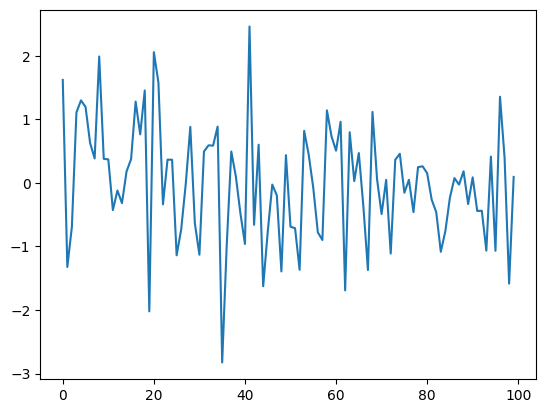

200
SharpRatio: 0.06806180334868234
0.1250000000000004
change_num: 61


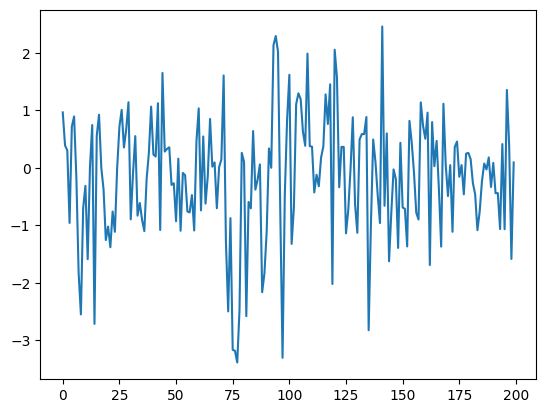

300
SharpRatio: 0.04524600693442089
0.12900000000000045
change_num: 89


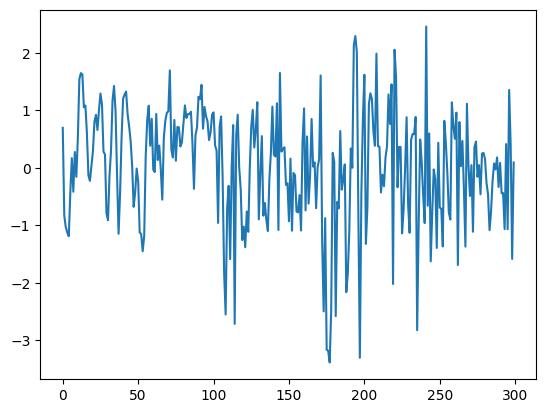

400
SharpRatio: 0.0751006794065124
0.3090000000000004
change_num: 109


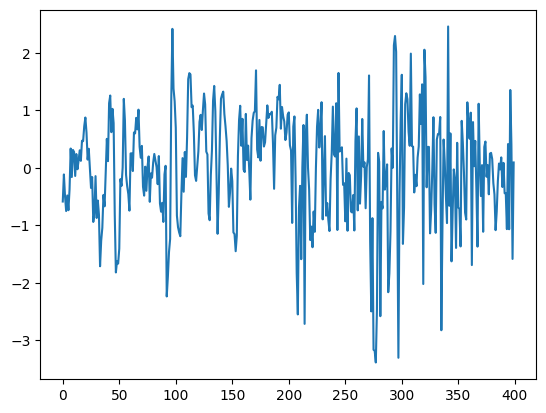

500
SharpRatio: 0.03556767065628566
0.2090000000000004
change_num: 136


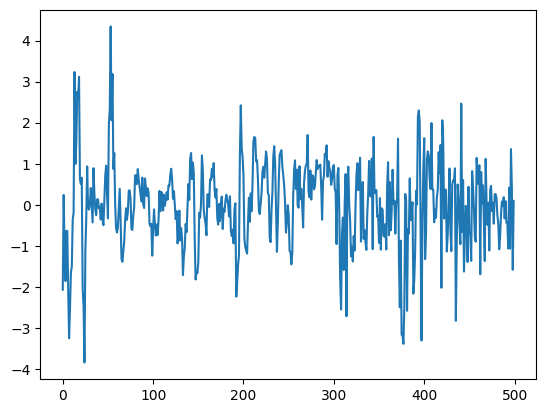

600
SharpRatio: 0.027383561128991582
0.20000000000000034
change_num: 165


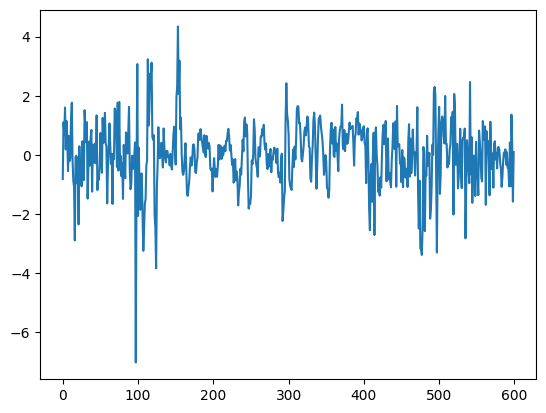

700
SharpRatio: 0.017240086933483247
0.14700000000000032
change_num: 225


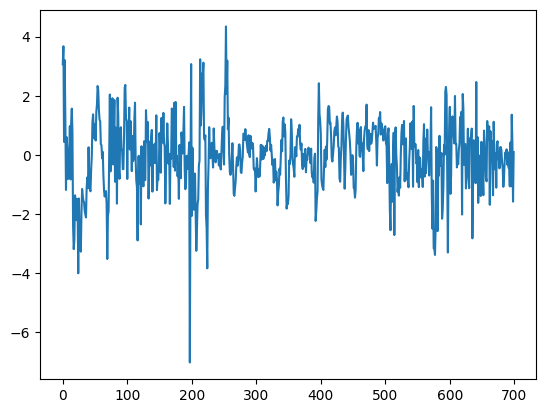

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing
import cvxpy as cp

magic_num = 30
estimate_num = 150

df_array = y_df.to_numpy()
df_array = np.squeeze(df_array)

for i in range(1,8):
  total_num = 100*i
  print(total_num)

  total_list = []
  y_list = []
  result_list = []
  predict_flag2 = 0
  change_num = 0
  score_list = []
  for j in range(magic_num-2,len(df_array)):
    X_return_list = []
    for k in range(1,magic_num):
      X_return_list.append((df_array[j-k]-df_array[j-k-1])*1)
    y_return = (df_array[j]-df_array[j-1])*1
    y_list.append(y_return)
    X_list2 = list(reversed(X_return_list))
    total_list.append(X_list2)
  #print(len(total_list))

  for j in range(len(total_list)):
    if j <= len(total_list)-1-total_num:
      continue
    #print(j)
    X_array = np.squeeze(np.array(total_list[j]))
    y_array = y_list[j]
    estimate_list = []
    estimate_y_list = []
    estimate_list2 = []
    estimate_y_list2 = []
    for k in range(1,estimate_num):
      estimate_list.append(total_list[j-k])
      estimate_y_list.append(y_list[j-k])
    for k in range(1,estimate_num):
      estimate_list2.append(total_list[j-k])
      estimate_y_list2.append(y_list[j-k])

    estimate_list = np.array(estimate_list)
    estimate_list = np.squeeze(estimate_list)
    estimate_y_list = np.array(estimate_y_list)
    estimate_list2 = np.array(estimate_list2)
    estimate_list2 = np.squeeze(estimate_list2)
    estimate_y_list2 = np.array(estimate_y_list2)
    #print(estimate_list)
    #print(estimate_y_list)


    #alpha = np.array([0,0.1,0.2,0.3,0.4,0.5])
    #print(estimate_list.shape)
    #print(estimate_y_list.shape)
    k= estimate_list.shape[1]
    beta = cp.Variable(k,nonneg=True)
    constraints =[beta[i] <= beta[i+1] for i in range(k-1)]
    #error = cp.norm2(estimate_y_list - estimate_list @ beta)
    objective =  cp.sum_squares(estimate_y_list - estimate_list @ beta)
    #objective = cp.Minimize(error)


    #prob = cp.Problem(objective, constraints)
    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve()
    #print("status:", prob.status)
    #print("optimal value", prob.value)
    #print("optimal var", beta.value)

    predict = np.dot(X_array,beta.value)
    predict2 = np.dot(estimate_list2,beta.value)
    #print(predict2)
    predict_score = (predict - np.mean(np.array(predict2)))/np.std(np.array(predict2))
    score_list.append(predict_score)

    #print(y_array)

    if predict_score >= 1.0:
      predict_flag = -1
      change_num +=1
    elif predict_score <-1.0:
      predict_flag = 1
      change_num +=1
    else:
      predict_flag = predict_flag2

    if predict_flag*predict_flag2 >=0:
      result_r = y_array*predict_flag
      result_list.append(result_r)
      predict_flag2 = predict_flag
    else:
      result_r = y_array*predict_flag-0.002
      result_list.append(result_r)
      predict_flag2 = predict_flag

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)
  print("change_num:",change_num)
  plt.plot(score_list)
  plt.show()




In [ ]:
#モメンタム逆張り
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing
import cvxpy as cp

magic_num = 30
estimate_num = 150

df_array = y_df.to_numpy()
df_array = np.squeeze(df_array)

for i in range(1,8):
  total_num = 100*i
  print(total_num)

  total_list = []
  y_list = []
  result_list = []
  predict_flag2 = 0
  change_num = 0
  score_list = []
  for j in range(magic_num-2,len(df_array)):
    X_return_list = []
    for k in range(1,magic_num):
      X_return_list.append((df_array[j-k]-df_array[j-k-1])*1)
    y_return = (df_array[j]-df_array[j-1])*1
    y_list.append(y_return)
    X_list2 = list(reversed(X_return_list))
    total_list.append(X_list2)
  #print(len(total_list))

  for j in range(len(total_list)):
    if j <= len(total_list)-1-total_num:
      continue
    #print(j)
    X_array = np.squeeze(np.array(total_list[j]))
    y_array = y_list[j]
    estimate_list = []
    estimate_y_list = []
    estimate_list2 = []
    estimate_y_list2 = []
    for k in range(1,estimate_num):
      estimate_list.append(total_list[j-k])
      estimate_y_list.append(y_list[j-k])
    for k in range(1,estimate_num):
      estimate_list2.append(total_list[j-k])
      estimate_y_list2.append(y_list[j-k])

    estimate_list = np.array(estimate_list)
    estimate_list = np.squeeze(estimate_list)
    estimate_y_list = np.array(estimate_y_list)
    estimate_list2 = np.array(estimate_list2)
    estimate_list2 = np.squeeze(estimate_list2)
    estimate_y_list2 = np.array(estimate_y_list2)
    #print(estimate_list)
    #print(estimate_y_list)


    #alpha = np.array([0,0.1,0.2,0.3,0.4,0.5])
    #print(estimate_list.shape)
    #print(estimate_y_list.shape)
    k= estimate_list.shape[1]
    beta = cp.Variable(k,nonneg=True)
    constraints =[beta[i] <= beta[i+1] for i in range(k-1)]
    #error = cp.norm2(estimate_y_list - estimate_list @ beta)
    objective =  cp.sum_squares(estimate_y_list - estimate_list @ beta)
    #objective = cp.Minimize(error)


    #prob = cp.Problem(objective, constraints)
    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve()
    #print("status:", prob.status)
    #print("optimal value", prob.value)
    #print("optimal var", beta.value)

    predict = np.dot(X_array,beta.value)
    predict2 = np.dot(estimate_list2,beta.value)
    #print(predict2)
    predict_score = (predict - np.mean(np.array(predict2)))/np.std(np.array(predict2))
    score_list.append(predict_score)

    #print(y_array)

    if predict_score >= 4.0:
      predict_flag = -1
      change_num +=1
    elif predict_score <-4.0:
      predict_flag = 1
      change_num +=1
    else:
      predict_flag = predict_flag2

    if predict_flag*predict_flag2 >=0:
      result_r = y_array*predict_flag
      result_list.append(result_r)
      predict_flag2 = predict_flag
    else:
      result_r = y_array*predict_flag-0.005
      result_list.append(result_r)
      predict_flag2 = predict_flag

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)
  print("change_num:",change_num)
  plt.plot(score_list)
  plt.show()

In [ ]:
#モメンタム順張り
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing
import cvxpy as cp

magic_num = 30
estimate_num = 150

df_array = y_df2.to_numpy()
df_array = np.squeeze(df_array)

for i in range(1,8):
  total_num = 100*i
  print(total_num)

  total_list = []
  y_list = []
  result_list = []
  predict_flag2 = 0
  for j in range(magic_num-2,len(df_array)):
    X_return_list = []
    for k in range(1,magic_num):
      X_return_list.append((df_array[j-k]-df_array[j-k-1])*1)
    y_return = (df_array[j]-df_array[j-1])*1
    y_list.append(y_return)
    X_list2 = list(reversed(X_return_list))
    total_list.append(X_list2)
  #print(len(total_list))

  for j in range(len(total_list)):
    if j <= len(total_list)-1-total_num:
      continue
    #print(j)
    X_array = np.squeeze(np.array(total_list[j]))
    y_array = y_list[j]
    estimate_list = []
    estimate_y_list = []
    for k in range(1,estimate_num):
      estimate_list.append(total_list[j-k])
      estimate_y_list.append(y_list[j-k])

    estimate_list = np.array(estimate_list)
    estimate_list = np.squeeze(estimate_list)
    estimate_y_list = np.array(estimate_y_list)
    #print(estimate_list)
    #print(estimate_y_list)


    #alpha = np.array([0,0.1,0.2,0.3,0.4,0.5])
    #print(estimate_list.shape)
    #print(estimate_y_list.shape)
    k= estimate_list.shape[1]
    beta = cp.Variable(k,nonneg=True)
    constraints =[beta[i] <= beta[i+1] for i in range(k-1)]
    #error = cp.norm2(estimate_y_list - estimate_list @ beta)
    objective =  cp.sum_squares(estimate_y_list - estimate_list @ beta)
    #objective = cp.Minimize(error)


    #prob = cp.Problem(objective, constraints)
    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve()
    #print("status:", prob.status)
    #print("optimal value", prob.value)
    #print("optimal var", beta.value)

    predict = np.dot(X_array,beta.value)
    #print(predict)
    #print(y_array)

    if predict >= 0:
      predict_flag = 1
    else:
      predict_flag = -1

    if predict_flag*predict_flag2 >=0:
      result_r = y_array*predict_flag
      result_list.append(result_r)
      predict_flag2 = predict_flag
    else:
      result_r = y_array*predict_flag-0.005
      result_list.append(result_r)
      predict_flag2 = predict_flag

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)



100
SharpRatio: -0.005490611531422874
-0.009999999999999606
200
SharpRatio: 0.010998982303128995
0.059000000000000205
300
SharpRatio: 0.01573669998697623
0.13700000000000012
400
SharpRatio: 0.016758811693524896
0.1879999999999996
500
SharpRatio: 0.0026899559845255387
0.03899999999999997
600
SharpRatio: -0.002895614390356978
-0.05000000000000081
700
SharpRatio: -0.0063647079069090295
-0.12400000000000105


100
SharpRatio: nan
0.0
change_num: 0


<ipython-input-23-d4278bb27c90>:106: RuntimeWarning: invalid value encountered in scalar divide
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))


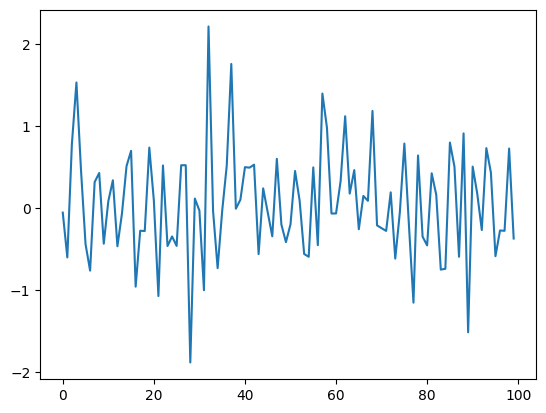

200
SharpRatio: 0.16119149541475972
0.45599999999999996
change_num: 1


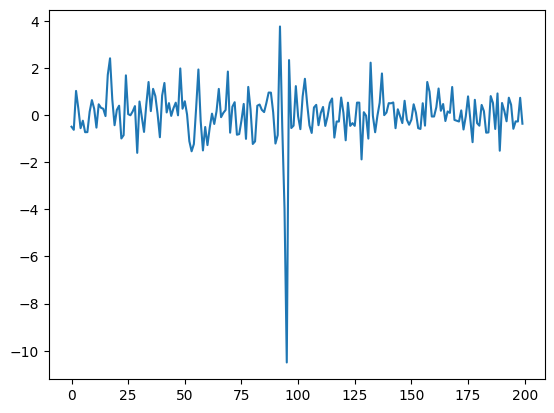

300
SharpRatio: 0.07018638880891737
0.502
change_num: 3


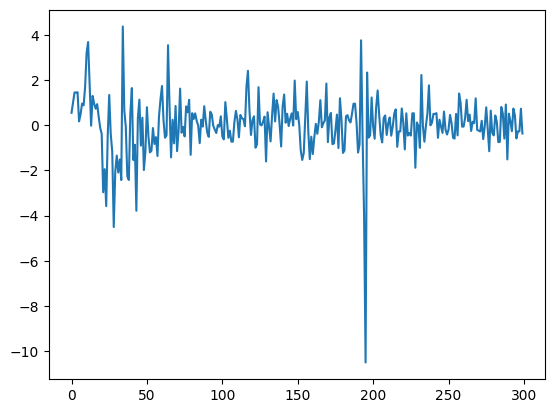

400
SharpRatio: 0.060745802009324036
0.502
change_num: 3


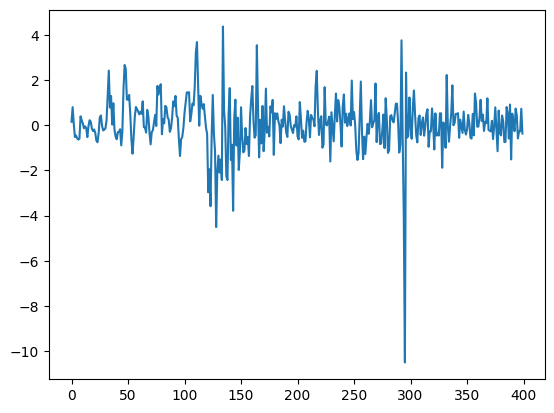

500
SharpRatio: 0.04872134869697564
0.5329999999999999
change_num: 5


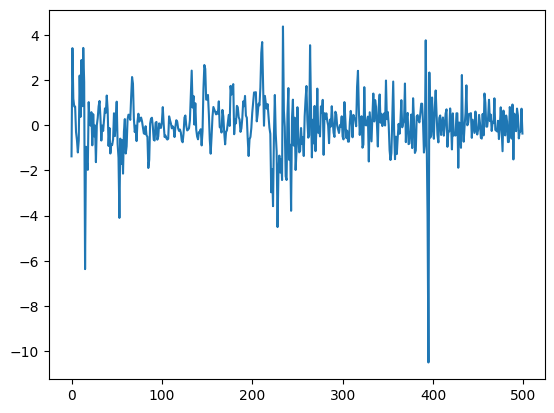

600
SharpRatio: 0.043158289331145266
0.5329999999999999
change_num: 6


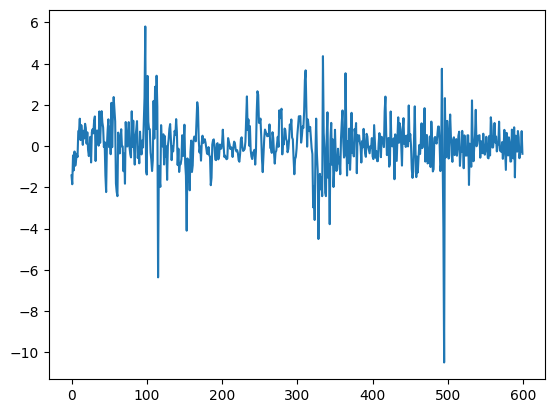

700
SharpRatio: 0.03995149671858629
0.5329999999999999
change_num: 6


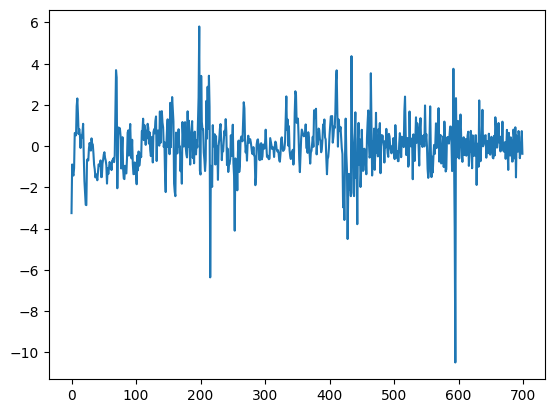

In [ ]:
#モメンタム逆張り
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api
import matplotlib.pyplot as plt
from sklearn import preprocessing
import cvxpy as cp

magic_num = 30
estimate_num = 150

df_array = y_df2.to_numpy()

for i in range(1,8):
  total_num = 100*i
  print(total_num)

  total_list = []
  y_list = []
  result_list = []
  predict_flag2 = 0
  change_num = 0
  score_list = []
  for j in range(magic_num-2,len(df_array)):
    X_return_list = []
    for k in range(1,magic_num):
      X_return_list.append((df_array[j-k]-df_array[j-k-1])*1)
    y_return = (df_array[j]-df_array[j-1])*1
    y_list.append(y_return)
    X_list2 = list(reversed(X_return_list))
    total_list.append(X_list2)
  #print(len(total_list))

  for j in range(len(total_list)):
    if j <= len(total_list)-1-total_num:
      continue
    #print(j)
    X_array = np.squeeze(np.array(total_list[j]))
    y_array = y_list[j]
    estimate_list = []
    estimate_y_list = []
    estimate_list2 = []
    estimate_y_list2 = []
    for k in range(1,estimate_num):
      estimate_list.append(total_list[j-k])
      estimate_y_list.append(y_list[j-k])
    for k in range(1,estimate_num):
      estimate_list2.append(total_list[j-k])
      estimate_y_list2.append(y_list[j-k])

    estimate_list = np.array(estimate_list)
    estimate_list = np.squeeze(estimate_list)
    estimate_y_list = np.array(estimate_y_list)
    estimate_list2 = np.array(estimate_list2)
    estimate_list2 = np.squeeze(estimate_list2)
    estimate_y_list2 = np.array(estimate_y_list2)
    #print(estimate_list)
    #print(estimate_y_list)


    #alpha = np.array([0,0.1,0.2,0.3,0.4,0.5])
    #print(estimate_list.shape)
    #print(estimate_y_list.shape)
    k= estimate_list.shape[1]
    beta = cp.Variable(k,nonneg=True)
    constraints =[beta[i] <= beta[i+1] for i in range(k-1)]
    #error = cp.norm2(estimate_y_list - estimate_list @ beta)
    objective =  cp.sum_squares(estimate_y_list - estimate_list @ beta)
    #objective = cp.Minimize(error)


    #prob = cp.Problem(objective, constraints)
    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve()
    #print("status:", prob.status)
    #print("optimal value", prob.value)
    #print("optimal var", beta.value)

    predict = np.dot(X_array,beta.value)
    predict2 = np.dot(estimate_list2,beta.value)
    #print(predict2)
    predict_score = (predict - np.mean(np.array(predict2)))/np.std(np.array(predict2))
    score_list.append(predict_score)

    #print(y_array)

    if predict_score >= 4.0:
      predict_flag = -1
      change_num +=1
    elif predict_score <-4.0:
      predict_flag = 1
      change_num +=1
    else:
      predict_flag = predict_flag2

    if predict_flag*predict_flag2 >=0:
      result_r = y_array*predict_flag
      result_list.append(result_r)
      predict_flag2 = predict_flag
    else:
      result_r = y_array*predict_flag-0.005
      result_list.append(result_r)
      predict_flag2 = predict_flag

  R_sum = sum(result_list)
  SR = np.mean(np.array(result_list))/np.std(np.array(result_list))
  print("SharpRatio:",SR)
  print(R_sum)
  print("change_num:",change_num)
  plt.plot(score_list)
  plt.show()

In [ ]:
!pip install cvxpy